FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS


Objective
:
Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset

. 
Datas
et:
The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and second column represent exchange rates USD to Australian Dollar.


In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pmdarima (from versions: none)
ERROR: No matching distribution found for pmdarima


Part 1: Data Preparation and Exploration

1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.

2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
                                             
3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.


In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
# adfuller checks if data is stationary or non-stationary (Augmented Dickey-Fuller (ADF) test)

from statsmodels.tsa.arima.model import ARIMA
# ARIMA function for model building

from pmdarima import auto_arima
# from auto_arima we will get order of p,d,q

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline

In [4]:
df = pd.read_csv('/content/exchange_rate.csv')
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df.set_index('date', inplace=True)

In [5]:
df

Ex_rate
date                
1990-01-01  0.785500
1990-01-02  0.781800
1990-01-03  0.786700
1990-01-04  0.786000
1990-01-05  0.784900
...              ...
2010-10-06  0.718494
2010-10-07  0.721839
2010-10-08  0.723197
2010-10-09  0.720825
2010-10-10  0.720825

[7588 rows x 1 columns]

In [6]:
# Visualize the time series
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'])
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD to AUD)')
plt.show()

In [7]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display missing values
missing_values


Ex_rate    0
dtype: int64

Part 2: Model Building - ARIMA

1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series
   .3
2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time serie
   s5
3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequaci
   e7.
4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.


In [10]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [11]:
# ACF and PACF plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(df['Ex_rate'], lags=40, ax=plt.gca())
plt.subplot(1, 2, 2)
plot_pacf(df['Ex_rate'], lags=40, ax=plt.gca())
plt.show()

In [12]:
adfuller(df['Ex_rate'])[1]

0.4492327353597477

In [13]:
# Arima model Building

In [14]:
order = auto_arima(df['Ex_rate'])

In [15]:
order

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [16]:
# split data
train=df.iloc[:-30]
test=df.iloc[-30:]

In [17]:
model = ARIMA(train['Ex_rate'], order=(1, 1, 0)).fit()

In [18]:
ypred=model.predict(start=7558,end=7587)
ypred

2010-09-11    0.744095
2010-09-12    0.744155
2010-09-13    0.744147
2010-09-14    0.744148
2010-09-15    0.744148
2010-09-16    0.744148
2010-09-17    0.744148
2010-09-18    0.744148
2010-09-19    0.744148
2010-09-20    0.744148
2010-09-21    0.744148
2010-09-22    0.744148
2010-09-23    0.744148
2010-09-24    0.744148
2010-09-25    0.744148
2010-09-26    0.744148
2010-09-27    0.744148
2010-09-28    0.744148
2010-09-29    0.744148
2010-09-30    0.744148
2010-10-01    0.744148
2010-10-02    0.744148
2010-10-03    0.744148
2010-10-04    0.744148
2010-10-05    0.744148
2010-10-06    0.744148
2010-10-07    0.744148
2010-10-08    0.744148
2010-10-09    0.744148
2010-10-10    0.744148
Freq: D, Name: predicted_mean, dtype: float64

In [19]:
print(np.sqrt(mean_squared_error(test['Ex_rate'], ypred)))

0.0166346976048715


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 0)   Log Likelihood               28054.159
Date:                Mon, 26 Aug 2024   AIC                         -56104.319
Time:                        12:58:38   BIC                         -56090.450
Sample:                    01-01-1990   HQIC                        -56099.559
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -64.439      0.000      -0.135      -0.127
sigma2      3.595e-05   9.94e-08    361.720      0.000    3.58e-05    3.61e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-

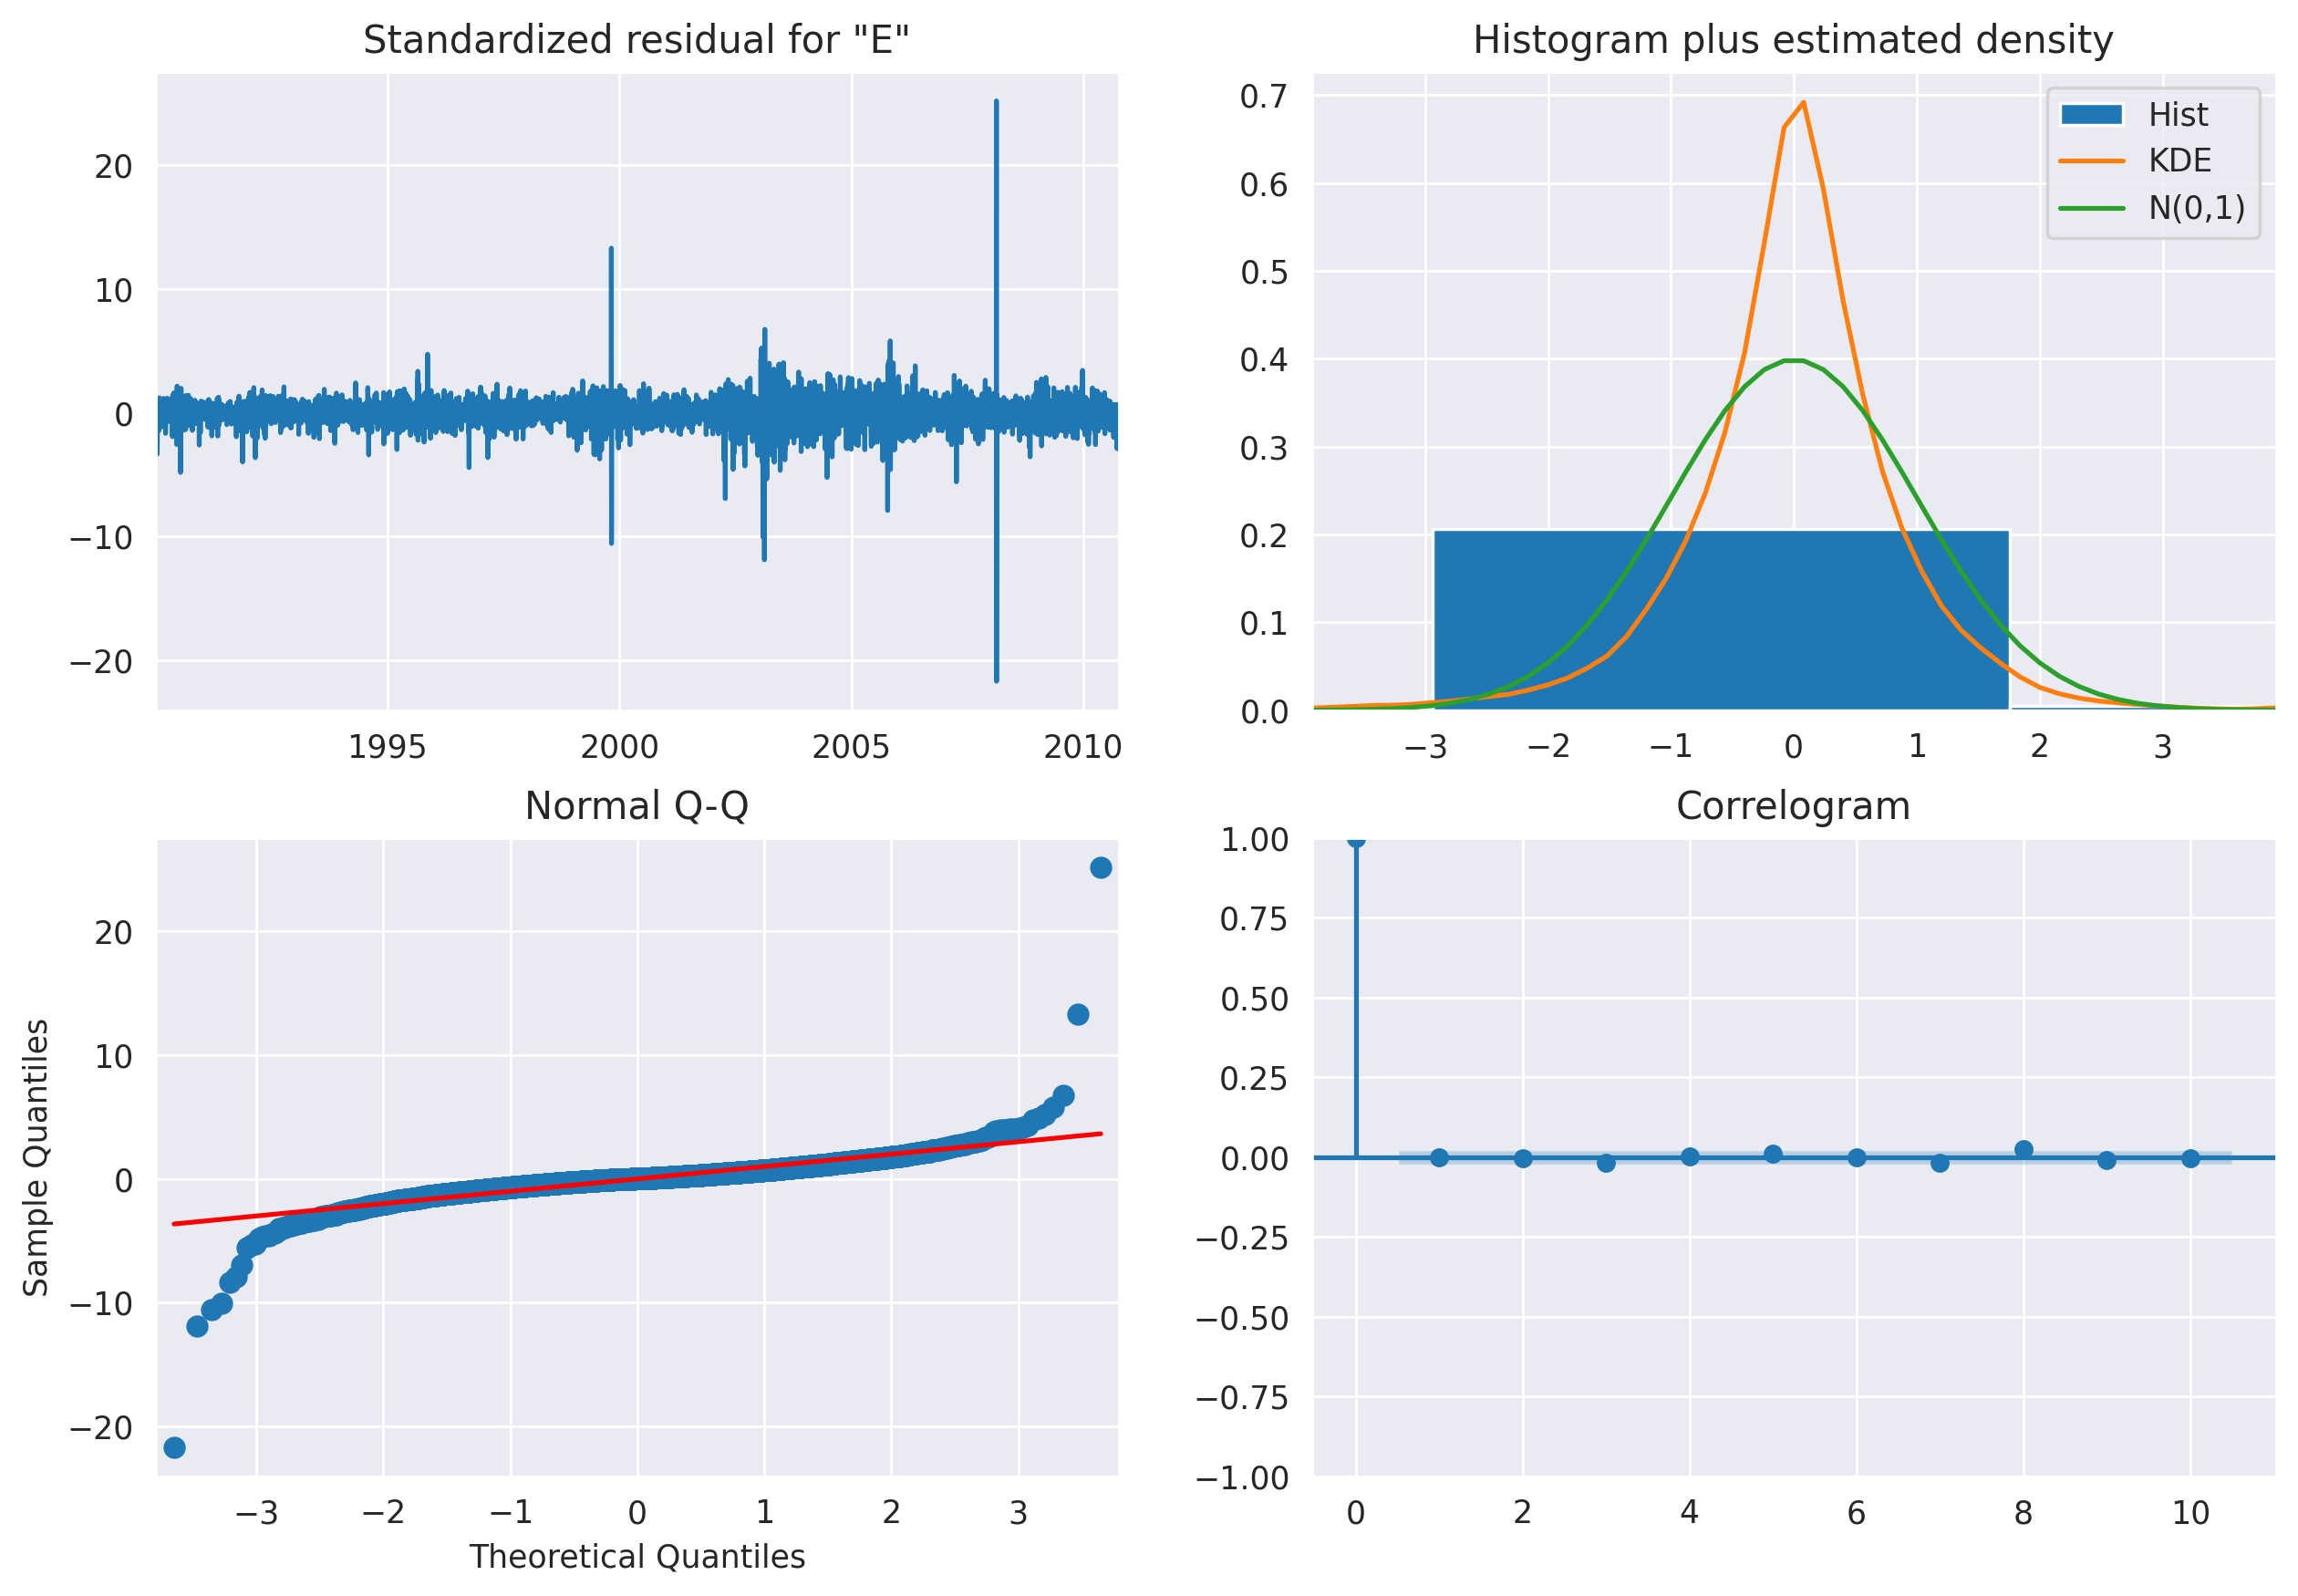

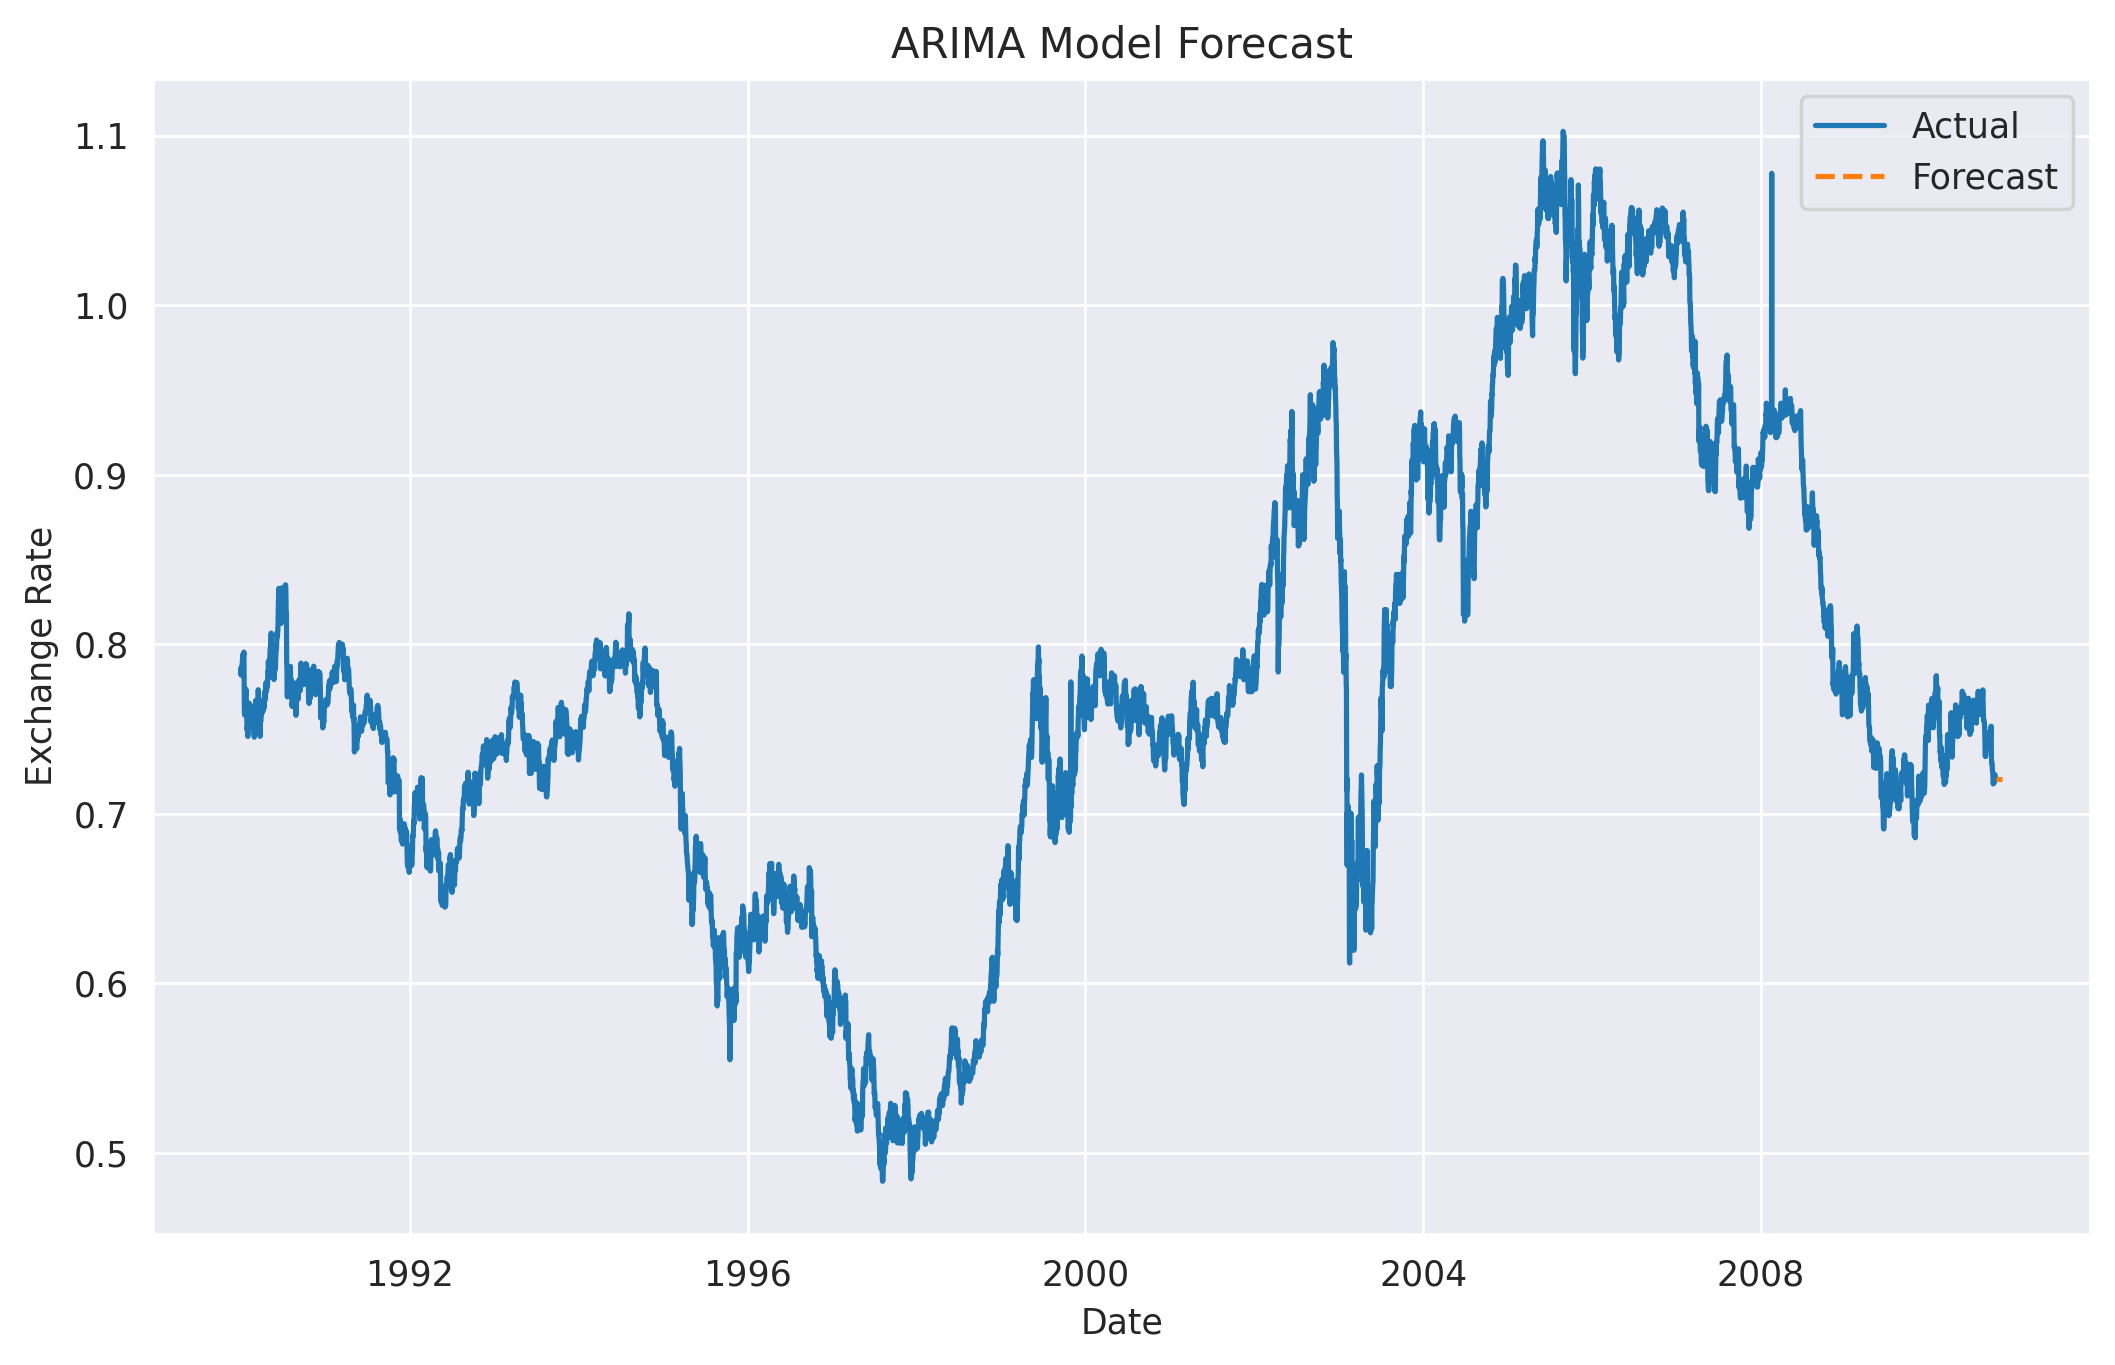

MAE: 0.012724599999999968, RMSE: 0.016983602872574836


In [20]:
p=1
d=1
q=0

model = ARIMA(df['Ex_rate'], order=(p, d, q))
arima_result = model.fit()

# Print model summary
print(arima_result.summary())

# Diagnostics
arima_result.plot_diagnostics(figsize=(12, 8))
plt.show()

# Forecasting
forecast_steps = 30  # Adjust based on desired forecast horizon
forecast = arima_result.forecast(steps=forecast_steps)

# Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Calculate error metrics
y_true = df['Ex_rate'].iloc[-forecast_steps:]
y_pred = forecast[:len(y_true)]
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'MAE: {mae}, RMSE: {rmse}')


Part 3: Model Building - Exponential Smoothing

1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters)
   .3
2.	Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and component
   s5
3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77624.574
Trend:                         Additive   BIC                         -77513.625
Seasonal:                      Additive   AICC                        -77624.483
Seasonal Periods:                    12   Date:                 Mon, 26 Aug 2024
Box-Cox:                          False   Time:                         13:01:02
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8702071                alpha                 True
smoothing_trend          

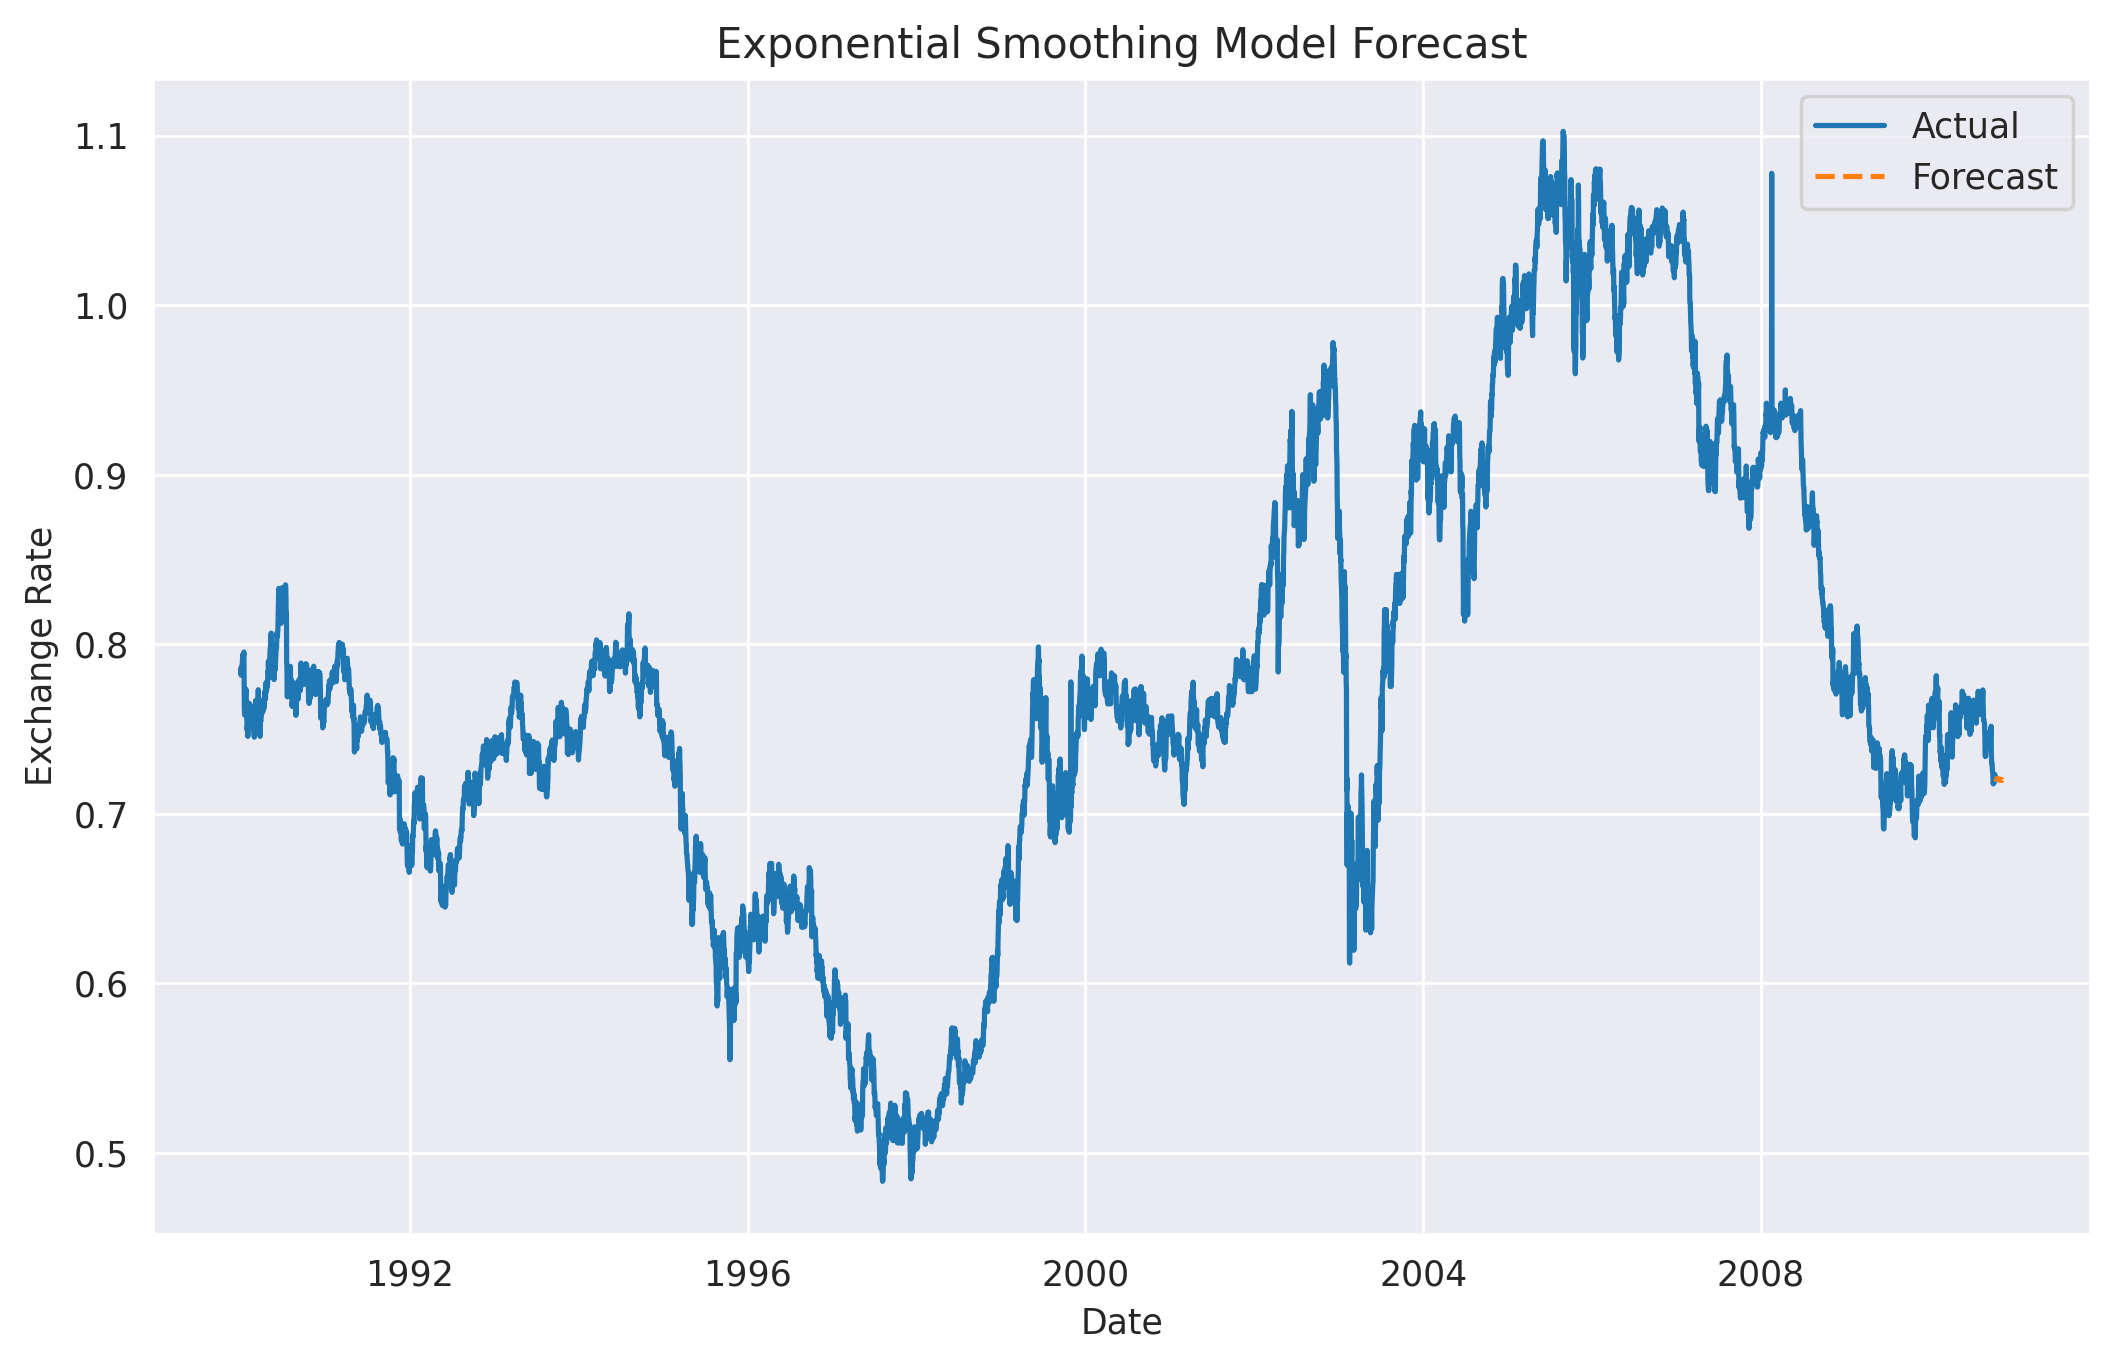

MAE: 0.013017654522635458, RMSE: 0.017245999955208903


In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Exponential Smoothing model
# Choose a model type based on your data characteristics
model = ExponentialSmoothing(
    df['Ex_rate'],
    trend='add',   # or 'mul' for multiplicative trend
    seasonal='add',  # or 'mul' for multiplicative seasonality
    seasonal_periods=12  # Adjust based on your data
)

exp_result = model.fit()

# Print model summary
print(exp_result.summary())

# Forecasting
exp_forecast = exp_result.forecast(steps=forecast_steps)

# Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(exp_forecast.index, exp_forecast, label='Forecast', linestyle='--')
plt.title('Exponential Smoothing Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Calculate error metrics
y_true_exp = df['Ex_rate'].iloc[-forecast_steps:]
y_pred_exp = exp_forecast[:len(y_true_exp)]
mae_exp = mean_absolute_error(y_true_exp, y_pred_exp)
rmse_exp = np.sqrt(mean_squared_error(y_true_exp, y_pred_exp))
print(f'MAE: {mae_exp}, RMSE: {rmse_exp}')

Part 4: Evaluation and Comparison

1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models
   .3
2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metric
   s5
3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.


In [23]:
# Display error metrics for comparison
print(f'ARIMA Model - MAE: {mae}, RMSE: {rmse}')
print(f'Exponential Smoothing Model - MAE: {mae_exp}, RMSE: {rmse_exp}')

ARIMA Model - MAE: 0.012724599999999968, RMSE: 0.016983602872574836
Exponential Smoothing Model - MAE: 0.013017654522635458, RMSE: 0.017245999955208903
